<a href="https://colab.research.google.com/github/Sachinsatya/Dog_vs_Cat_DeepLearning_kaggleDataset/blob/main/Dog_Vs_Cat_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mv kaggle.json /root/.kaggle

In [ ]:
import kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 98% 798M/812M [00:03<00:00, 257MB/s]
100% 812M/812M [00:04<00:00, 210MB/s]


In [ ]:
# Unzip the data
! unzip -q dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip -q train.zip

In [ ]:
import os

In [ ]:
os.listdir("train") # what is the content in train folder?

In [ ]:
len(os.listdir("train"))

25000

In [ ]:
# 25000 images of dogs and cats ...! 

In [ ]:
from PIL import Image

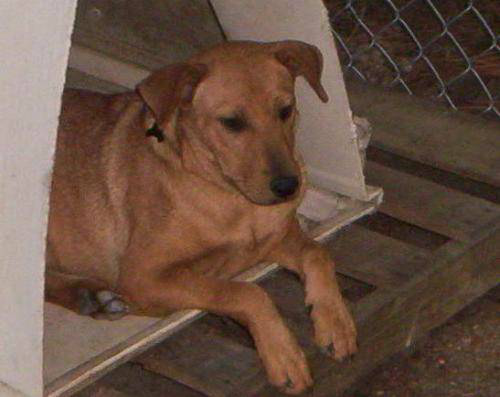

In [ ]:
Image.open("train/dog.100.jpg")

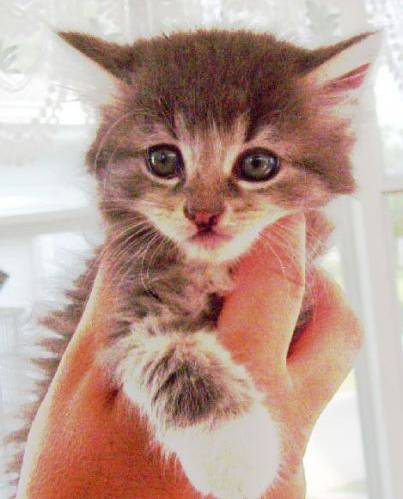

In [ ]:
Image.open("train/cat.100.jpg")

In [ ]:
import cv2 
print(f"Random dog image: {cv2.imread('train/dog.100.jpg').shape}")
print(f"Random cat image: {cv2.imread('train/cat.100.jpg').shape}")

Random dog image: (397, 500, 3)
Random cat image: (499, 403, 3)


In [ ]:
# For any DL project, we need Images and Labels ?? 
# They have given images in train folder but where are the labels? 

# MNIST - x_train -images, y_train - labels ??? 

# for this particular competition, the labels are encoded in image name itself! 

In [ ]:
# we need to make - 
# x_train (array) - which contains all the images
# y_train (array) - which contains all the labels 

In [ ]:
# Go in folder "train"
# Read each images using cv2 
# convert BGR2RGB 
# resize images to (150, 150) 
# append in an array x_train

In [ ]:
import os, cv2
x_train = []
y_train = []
for filename in os.listdir("train"):
  # read individual files
  image = cv2.imread("train/"+filename)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (150, 150))
  x_train.append(image)
  if "cat" in filename:
    # y_train.append('cat')
    y_train.append(0)
  else:
    # y_train.append("dog")
    y_train.append(1)

In [ ]:
len(x_train)

25000

In [ ]:
import numpy as np

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train.shape # number of images x Height x Width x Channel

(25000, 150, 150, 3)

In [ ]:
y_train.shape # number of labels

(25000,)

In [ ]:
import matplotlib.pyplot as plt

dog


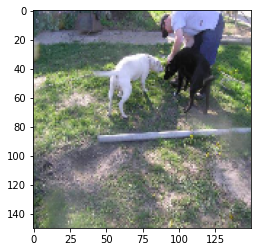

In [ ]:
num = 77 
plt.imshow(x_train[num])
print(y_train[num])

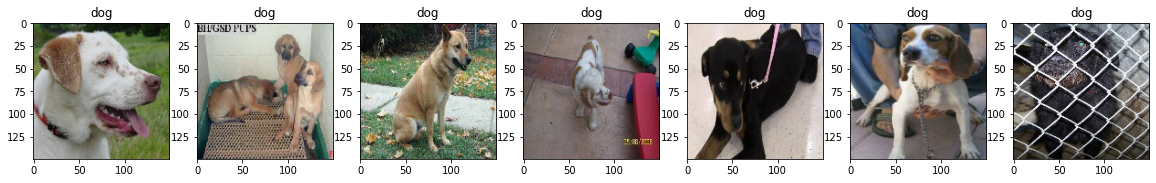

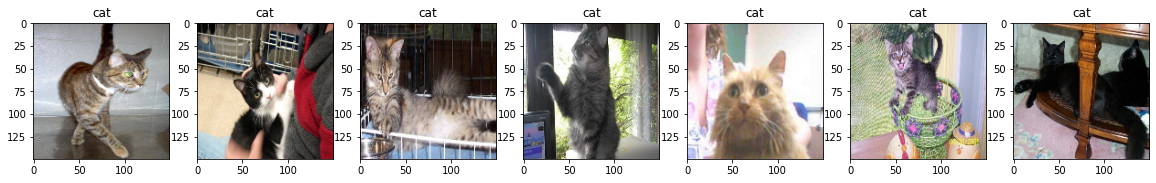

In [ ]:
# how many images in each row
num_of_images = 7
# how many categories do we have
num_of_cat = 2
# Ietrate over these 2 labels
for category in ("dog", "cat"):
  # give indexs of 7 random images of category
  index = np.random.choice(np.where(y_train == category)[0], num_of_images)
  # Setup a Graph to plot images
  plt.figure(figsize=(20, 20))
  # Arrange the row
  for row in range(num_of_cat):
    for col in range(num_of_images):
      plt.subplot(len(category), num_of_images, col+1)
      plt.imshow(x_train[index[col]])
      plt.title(f"{category}")
  # plt.show()

In [ ]:
np.where(y_train == "dog")

(array([    1,     5,    12, ..., 24995, 24997, 24998]),)

In [ ]:
np.where(y_train == "dog")[0]

array([    1,     5,    12, ..., 24995, 24997, 24998])

In [ ]:
x_train.shape

(25000, 150, 150, 3)

In [ ]:
y_train.shape

(25000,)

In [ ]:
# Split the data into 2 parts of train and test (x_train, x_test)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.7)

In [ ]:
x_train.shape, y_train.shape

((7500, 150, 150, 3), (7500,))

In [ ]:
x_test.shape, y_test.shape

((17500, 150, 150, 3), (17500,))

In [ ]:
# Pre-processing 
x_train = x_train / 255.0
y_train = tf.keras.utils.to_categorical(y_train)

In [ ]:
x_train.shape, y_train.shape

((7500, 150, 150, 3), (7500, 2))

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((150, 150, 3), name= "InputLayer"))
model.add(tf.keras.layers.Flatten(name="Flatten"))
model.add(tf.keras.layers.Dense(128, activation=tf.keras.activations.relu, name="HiddenLayer"))
model.add(tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax, name ="OutputLayer"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 67500)             0         
                                                                 
 HiddenLayer (Dense)         (None, 128)               8640128   
                                                                 
 OutputLayer (Dense)         (None, 2)                 258       
                                                                 
Total params: 8,640,386
Trainable params: 8,640,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(150*150*3)*128 + 128

8640128

In [ ]:
128*2 + 2 

258

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.categorical_crossentropy, metrics = ["acc"])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 15s 33ms/step - loss: 0.7240 - acc: 0.5280 - val_loss: 0.6780 - val_acc: 0.5840
Epoch 2/10
422/422 [==============================] - 13s 30ms/step - loss: 0.6765 - acc: 0.5744 - val_loss: 0.6644 - val_acc: 0.5907
Epoch 3/10
422/422 [==============================] - 13s 30ms/step - loss: 0.6685 - acc: 0.5911 - val_loss: 0.6589 - val_acc: 0.5973
Epoch 4/10
422/422 [==============================] - 13s 30ms/step - loss: 0.6577 - acc: 0.6059 - val_loss: 0.6627 - val_acc: 0.5960
Epoch 5/10
422/422 [==============================] - 13s 32ms/step - loss: 0.6539 - acc: 0.6104 - val_loss: 0.6452 - val_acc: 0.6040
Epoch 6/10
422/422 [==============================] - 17s 39ms/step - loss: 0.6500 - acc: 0.6129 - val_loss: 0.6604 - val_acc: 0.6120
Epoch 7/10
422/422 [==============================] - 15s 34ms/step - loss: 0.6428 - acc: 0.6212 - val_loss: 0.6470 - val_acc: 0.6227
Epoch 8/10
422/422 [==============================] - 14s 33ms

In [ ]:
model.save("dogvscatmodel")